# Trabajo Final 
Nombre: Irinnia Vargas Velasquez

Código: 20176131

Como parte del trabajo final del curso he elegido trabajar con la base de datos "Indicadores de desarrollo Global"

In [24]:
#Abrir la base de datos y las librerías: Data_1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

ruta_IDG= "C:/Users/Irinnia/OneDrive/Documentos/Prácticas QLAB/python_para_las_ccss/Tareas/51f7ab6a-24ed-4a06-9f5d-04873f1673fd_Data-1.csv"
df_IDG= pd.read_csv(ruta_IDG)
df_IDG

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,..
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,..,..
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,..
4,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170626997947693,..,..,..,..,..,...,0.53,0.5,0.5,0.5,0.39,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Explorar las variables 
nomb_variables = df_IDG.columns 
nomb_variables

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

## Limpieza y configuración :

Es necesario tener una sola columna que agrupe todos los años presentados en el data frame desde 1960 hasta el 2022.Eso es lo que se realiza a continuación:

In [3]:
#Loop cpara crear una lista con las columnas de los años
year_all = [col for col in df_IDG.columns if col.startswith('19') or col.startswith('20')]

# Función melt para combinar las columnas seleccionadas en una sola
df_IDG_melted = pd.melt(df_IDG,
                        id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                        value_vars=year_all,
                        var_name='Year',
                        value_name='Value')
df_IDG_melted

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960 [YR1960],..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960 [YR1960],..
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960 [YR1960],..
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960 [YR1960],..
4,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960 [YR1960],0.170626997947693
...,...,...,...,...,...,...
100858,NaN,NaN,NaN,NaN,2022 [YR2022],NaN
100859,NaN,NaN,NaN,NaN,2022 [YR2022],NaN
100860,NaN,NaN,NaN,NaN,2022 [YR2022],NaN
100861,Data from database: World Development Indicators,NaN,NaN,NaN,2022 [YR2022],NaN


In [6]:
# Luego, se necesita que la columna de year a tipo string y luego extraer solo los primeros cuatro caracteres
df_IDG_melted['Year'] = df_IDG_melted['Year'].astype(str).str[:4]

# Se converte la columna 'Year' a tipo entero:
df_IDG_melted['Year'] = df_IDG_melted['Year'].astype(int)

df_IDG_melted.head(15)

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,..
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,..
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,..
4,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,0.170626997947693
5,Afghanistan,AFG,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,1960,..
6,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,..
7,Albania,ALB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,..
8,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,..
9,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,..


## Gráficos
Se seleccionaron los indicadores: CO2 emissions y GDP growth

In [7]:
# Gráfico 1
CO2_indicator = 'CO2 emissions (metric tons per capita)'
GDP_indicator = 'GDP growth (annual %)'

power_countries = ['United States', 'China', 'India', 'Germany', 'Russia', 'Japan']

# A continuación, se generarán unos filtros de acuerdo a los indicadores propuestos solo para mostrar los datos:

df_filter = df_IDG_melted[(df_IDG_melted['Series Name'].isin([CO2_indicator, GDP_indicator])) &
                        (df_IDG_melted['Country Name'].isin(power_countries ))]
df_filter

,Country Name,Country Code,Series Name,Series Code,Year,Value
248,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,..
249,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,..
440,Germany,DEU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,..
441,Germany,DEU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,..
536,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,..
...,...,...,...,...,...,...
99799,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2022,7.23969328081449
99852,Japan,JPN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2022,..
99853,Japan,JPN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2022,1.02862486644142
100500,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2022,..


In [15]:
# Es necesario corroborar que todas las observaciones contengan datos numéricos:
df_filter.loc[:, 'Value'] = pd.to_numeric(df_filter['Value'], errors='coerce')

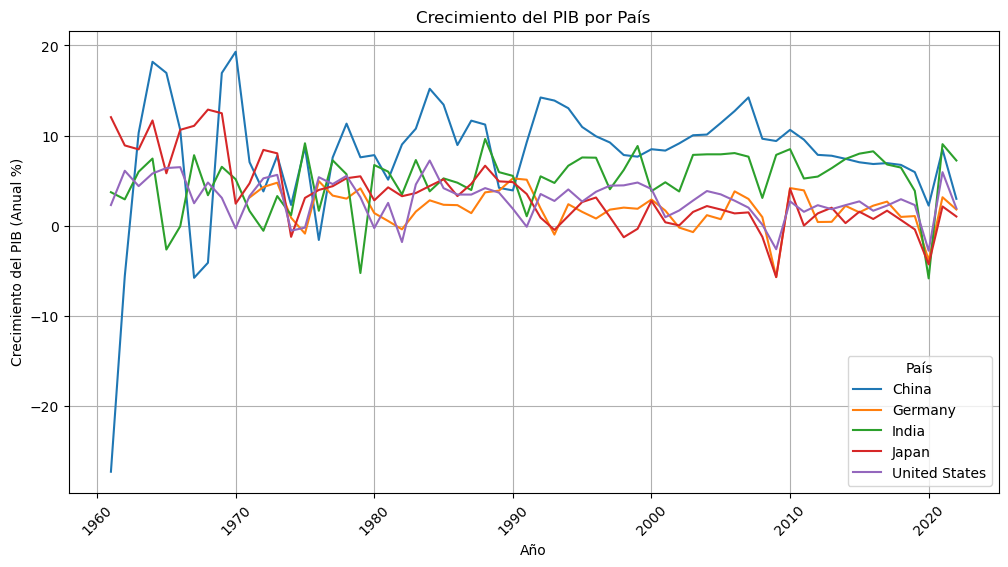

In [11]:
# Gráfico 1: Crecimiento del PBI de cada país
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged[df_merged['Series Name'] == Value_GDP],
             x='Year', y='Value', hue='Country Name')
plt.title('Crecimiento del PIB por País')
plt.ylabel('Crecimiento del PIB (Anual %)')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(True)
plt.show()

In [22]:
print(df_filter.columns)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year',
       'Value'],
      dtype='object')


In [40]:
# Gráfico de dispersión: relación entre el GDP y la emisión de CO2
# Dado que ambos indicadores se encuentran contenidos en la columna "Series Name" es necesario realizar un melted para cambiar dicho orden (long a wide)
df_CO2 = df_IDG_melted[(df_IDG_melted['Series Name'] == CO2_indicator)].copy()
df_GDP = df_IDG_melted[(df_IDG_melted['Series Name'] == GDP_indicator)].copy()

# Nos aseguramos de que sean datos numéricos y que además correspondan con el valor que se les asigna en la columna de "Value":
df_CO2['Value'] = pd.to_numeric(df_CO2['Value'], errors='coerce')
df_GDP['Value'] = pd.to_numeric(df_GDP['Value'], errors='coerce')

# Se crea una nueva base de datos usando únicamente los valores que nos interesan 
df_new = pd.merge(df_CO2, df_GDP, on=['Country Name', 'Year'], suffixes=('_GDP', '_CO2'))

# Se crea el gráfico de dispersión:
alt.Chart(df_new).mark_point().encode(
    x=alt.X("Value_CO2:Q", title='CO2 emissions'),  # Variable en el eje x
    y=alt.Y("Value_GDP:Q", title='GDP growth'),  # Variable en el eje y
    color='Country:N',  # Variable para el color (columna 'Country')
    tooltip=['Country:N', 'Value_CO2:Q', 'Value_GDP:Q']  # Información que aparecerá al pasar el ratón sobre los puntos
).properties(
    width=500,  # Ancho del gráfico
    height=300  # Altura del gráfico
).interactive

# Por último, dado que he tenido algunos problemas para mostrar el gráfico lo he almacenado en el siguiente html:
scatter_chart.save('scatter_chart.html')